In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import uncertainties.umath


FWHM (m): 0.015143410298625823
beta (rad): 0.9339918310249498 dbeta (rad) 0.0445+/-0.0013
dLamda (m): (2.21+/-0.06)e-08


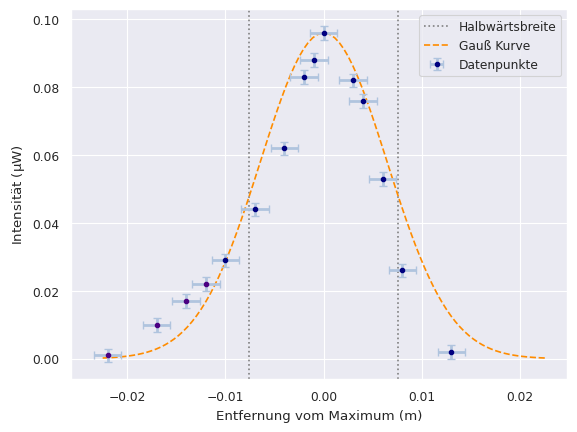

In [8]:
#load data and set errors
df = pd.read_csv('Laser_Bandbreite.csv')
pos = df['Position/cm']
#shift distribution to be around maximum
pos = pos - 2.7 #in cm
pos = pos *10**(-2) #in m
pos_err = 0.14 * np.ones(len(pos)) #in cm
pos_err = pos_err * 10**(-2) #in m
intens = df['Leistung (Int.)/microW']
intens_err = 0.002 * np.ones(len(intens))

#calculate full width at half maximum intensity
sigma = np.std(pos[0:11])
fwhm = 2 * np.sqrt(2*np.log(2)) * sigma # in cm
print('FWHM (m):', fwhm)

#calcualte wavelength difference (line width) with fwhm
k = 1 #diffraction order
d = 1/(1200 * 10**(3)) #diffraction coefficient of the grid in m
b = ufloat(0.34, 0.01) #distance between grid and detector in m  -> which to use !?
lamda = 670 *10**(-9) # ideal wavelength of laser 670 nm from datasheet DL-3149-056
beta = asin(k*lamda/d) #standard diffraction equation
#beta = 2*np.pi * 115/360 
dbeta = 2 * atan(0.5*fwhm/b)

dlamda = (d/k) * np.cos(beta) * dbeta
print('beta (rad):', beta, 'dbeta (rad)', dbeta)
print('dLamda (m):', dlamda)

#prepare gaussian for comparison
mu = 0 # since pos has been shifted
x = np.linspace(-3.5*sigma, 3.5*sigma, 100)
#scaling the normal distribution to fit the data
scaling =  np.sqrt(2*np.pi)*sigma *intens.max()
y = scaling * stats.norm.pdf(x, mu, sigma)

#plot results
sns.set_theme(style="darkgrid")
sns.set_context("paper")
plt.axvline(x = -fwhm/2, color = 'grey', linestyle = ':', label = 'Halbwärtsbreite')
plt.axvline(x = fwhm/2, color = 'grey', linestyle = ':')
plt.plot(x, y, '--', color = 'darkorange', label = 'Gauß Kurve')
plt.errorbar(x=pos[0:11], y=intens[0:11], 
             xerr= pos_err[0:11], yerr= intens_err[0:11], markersize=6,
             fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datenpunkte")
plt.errorbar(x=pos[11:], y=intens[11:], 
             xerr= pos_err[11:], yerr= intens_err[11:], markersize=6,
             fmt=".",color="indigo", ecolor="lightsteelblue", elinewidth=2, capsize=3)
plt.xlabel('Entfernung vom Maximum (m)')
plt.ylabel('Intensität $\mathregular{(\mu W)}$')
plt.legend()